In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tqdm import tqdm

from collections import defaultdict
import re
import time

In [20]:
### You may import any Python's standard library here (Do not import other external libraries) ###


In [2]:
pass_test1_1_1 = False
pass_test1_1_2 = False
pass_test1_2 = False
pass_test2_1 = False
pass_test2_2 = False

## Implementing LSH algorithm

### 0. Dataset

#### 0.1 Import 20-news dataset

In [3]:
newsgroup_dataset = datasets.fetch_20newsgroups(data_home='./dataset/', subset='train', 
                                                remove=('headers', 'footers', 'quotes'), download_if_missing=True)

In [4]:
raw_documents = newsgroup_dataset['data']    # removed [:10] for test
len(raw_documents)

11314

In [5]:
raw_documents[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

#### 0.2 Preprocess the documents

In [6]:
K = 5  # number of word tokens to shingle

In [7]:
def preprocess(documents):
    processed_words = defaultdict(list)
    cnt = 0
    
    for doc in documents:
        # first, filter out some uncesseary symbols like punctuations
        doc = re.sub('\/|\-|\'|\@|\%|\$|\#|\,|\(|\)|\}|\"|\{|\?|\.|\!|\;|\:', '', doc)
        
        # second, split the document into the words
        for word in doc.split():
            
            # third, let word to be the lower-case
            if word.isalpha():
                processed_words[cnt].append(word.lower())
        
        # fourth, filter out the articles that has less than k shingles
        if len(processed_words[cnt]) < K:
            continue
        else:
            processed_words[cnt] = ' '.join(processed_words[cnt])
            cnt += 1

    return list(processed_words.values())

In [8]:
documents = preprocess(raw_documents)
del raw_documents
len(documents)

10882

In [9]:
documents[0]

'i was wondering if anyone out there could enlighten me on this car i saw the other day it was a sports car looked to be from the late early it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyone can tellme a model name engine specs years of production where this car is made history or whatever info you have on this funky looking car please email'

### 1. Shingling

In [ ]:
########################################################################################################################
# Programming 1  [15pt]                                                                                                #
#  In this section, you will implement the shingling algorithm to convert the document into the characteristic matrix. #
#  However, since storing the whole characteristic matrix in the form of a dense matrix is expensivein terms of space, #
#    your implementation should store the characteristic matrix in the form of a dictionary.                           #
#                                                                                                                      #
#    i) get the all unique shingles from the documents [10pt]                                                          #
#   ii) create the dictionary that maps each document to the list of shingles [5pt]                                    #
#                                                                                                                      #
#  Note that, shingling is divided into 2-steps just for the readability of the algorithm                              #
#                                                                                                                      #
########################################################################################################################

#### 1.1 Get Shingles from the documents

In [10]:
def get_shingles(documents):
    ######################################################################################
    # Programming 1.1  [10pt]                                                            #
    #  Implement 'get_shingles' function to get 1-singles from the preprocessed documents  #
    #  You should especially be take care of your algorithm's computational efficiency   #
    #                                                                                    #
    #  Parameters:                                                                       #
    #    documents (dict)                                                                #
    #                                                                                    #
    #  Returns:                                                                          #
    #    shingles (set) set of tuples where each element is a k-shingle                  #
    #    ex) shingles = {('its', 'hard', 'to', 'say', 'whether'),                        #
    #                    ('known', 'bugs', 'in', 'the', 'warning') ...}                  #
    ######################################################################################
    
    shingles = set()
    for doc in documents:
        words = doc.split()
        for i in range(len(words)-K+1):
            shingles.add(tuple(words[i:i+K]))
    return shingles

In [11]:
start = time.time()
shingles = get_shingles(documents)
end = time.time()

# Check whether your implementation is correct [5pt]
if len(shingles) == 1766049:
    pass_test1_1_1 = True
    print('Test1 passed')
    
    # Check whether your implementation is efficient enough [5pt]
    # With 4-lines of my implementations, it took 4.8 seconds with i7-8700 cpu
    if (end - start) < 20:
        pass_test1_1_2 = True
        print('Test2 passed')
        

Test1 passed
Test2 passed


#### 1.2 Build document to shingles dictionary

In [12]:
def build_doc_to_shingle_dictionary(documents, shingles):
    ################################################################################################################################
    # Programming 1.2 [5pt]                                                                                                        #
    #  Implement 'build_doc_to_shingle_dictionary' function to convert documents into shingle dictionary with documents & shingles #
    #   You need to construct and utilize a shingle2idx dictionary that maps each shingle into the uniuqe integer index.           #
    #                                                                                                                              #
    #  Parameters:                                                                                                                 #
    #    documents (dict)                                                                                                          #                                               
    #    shingles (set)                                                                                                            #          
    #                                                                                                                              #
    #  Returns:                                                                                                                    #
    #    doc_to_shingles (dict)                                                                                                    #
    #        key: index of the documents                                                                                           #
    #        value: list of the shingle indexes                                                                                    #
    #        ex) doc_to_shingles = {0: [1705196, 422880, 491967, ...],                                                             #
    #                               1: [863922, 1381606, 1524066, ...],                                                            #
    #                               ... }                                                                                          #
    ################################################################################################################################
    
    doc_to_shingles = defaultdict(list)
    shingle2idx = {}
    
    # shingle2idx = {shingle0: 0, shingle1: 1, ...}
    for idx, shingle in enumerate(shingles):
        shingle2idx[shingle] = idx
    
    for idx, doc in enumerate(documents):
        words = doc.split()
        for i in range(len(words)-K+1):
            doc_to_shingles[idx].append(shingle2idx[tuple(words[i:i+K])])
    
    return doc_to_shingles

In [13]:
doc_to_shingles = build_doc_to_shingle_dictionary(documents, shingles)

# Check whether your implementation is correct [5pt]
if len(doc_to_shingles) == 10882 and len(doc_to_shingles[0]) == 84:
    pass_test1_2 = True
    print('Test passed')

Test passed


### 2. Min-Hashing

In [ ]:
############################################################################################################################
# Programming 2  [25pt]                                                                                                    #
#  In this section, you will implement the min-hashing algorithm to convert the characteristic matrix into the signatures. #
#                                                                                                                          #
#    i) implement the jaccard-similarity algorithm [5pt]                                                                   #
#   ii) implement the min-hash algorithm to create the signatures for the documents [20pt]                                 #
#                                                                                                                          #
############################################################################################################################

#### 2.1 Generate Prime numbers for Universal Hashing

In [14]:
def is_prime(n):
    for i in range(2,int(np.sqrt(n))+1):
        if not n % i:
            return False
    return True

def generate_prime_numbers(M, N):
    # this function generate the M prime numbers where each prime number is greater than N
    primes = []
    cnt = 0
    n = N + 1
    
    while cnt < M:
        if is_prime(n):
            primes.append(n)
            cnt += 1
        n += 1
    return primes

In [15]:
# Test prime number generation
generate_prime_numbers(M = 3, N = 3)

[5, 7, 11]

#### 2.2 Jaccard Similarity

In [16]:
def jaccard_similarity(s1, s2):
    ##################################################################################
    # Programming 2.2 [5pt]                                                          #                                    
    #   Implement the jaccard similarity algorithm to get the similarity of two sets #
    #                                                                                #
    # Parameters                                                                     #
    #    s1 (set)                                                                    #
    #    s2 (set)                                                                    #
    # Returns                                                                        #
    #    similarity (float)                                                          #
    ##################################################################################
    return len(s1.intersection(s2)) / len(s1.union(s2))

In [17]:
s1 = {1, 3, 4}
s2 = {3, 4, 6}

if (jaccard_similarity(s1, s2) - 0.5) < 1e-3:
    pass_test2_1 = True
    print('Test passed')

Test passed


#### 2.3 Min Hash

In [18]:
M = 100  # Number of Hash functions to use
N = len(shingles)

# First we will create M universal hashing functions
#  You can also modify or implement your own hash functions for implementing min_hash function

class Hash():
    def __init__(self, M, N, p):
        self.M = M
        self.N = N
        self.p = p
        
        self.a = np.random.randint(9999)
        self.b = np.random.randint(9999)
    
    def __call__(self, x):
        return np.mod(np.mod((self.a * x + self.b), self.p), self.N)
        
primes = generate_prime_numbers(M, N)
hash_functions = [Hash(M, N, p) for p in primes]

In [19]:
def min_hash(doc_to_shingles, hash_functions):
    ###########################################################################################
    # Programming 2.3 [20pt]                                                                  #                                    
    #   Implement the min-hash algorithm to create the signatures for the documents           #
    #   It would take about ~10 minutes to finish computation,                                #
    #      while would take ~20 seconds if you parallelize your hash functions                #                      
    #                                                                                         #
    #  Parameters                                                                             #
    #     doc_to_shingles: (dict) dictionary that maps each document to the list of shingles  #
    #     hash_functions: [list] list of hash functions                                       #
    #  Returns                                                                                #
    #     signatures (np.array) numpy array of size (M, C) where C is the number of documents #
    #                                                                                         #
    ###########################################################################################
    
    C = len(doc_to_shingles)
    M = len(hash_functions)
    signatures = np.array(np.ones((M, C)) * np.inf, dtype=np.int)
    
    for doc, shingles in doc_to_shingles.items():
        signatures[:, doc] = [np.min(hash_func(np.array(shingles))) for hash_func in hash_functions]

    return signatures

In [20]:
def compare(signatures, doc_to_shingles, trials = 10000):
    M, C = signatures.shape
    diff_list = []
    
    for t in tqdm(range(trials)):
        doc1, doc2 = np.random.choice(C, 2, replace = False)
        
        shingle1, shingle2 = set(doc_to_shingles[doc1]), set(doc_to_shingles[doc2])
        sig1, sig2 = signatures[:,doc1], signatures[:,doc2]
        
        true_sim = jaccard_similarity(shingle1, shingle2)
        approx_sim = sum(np.equal(sig1, sig2)) / M
        
        diff_list.append(abs(true_sim - approx_sim))
        
    return diff_list

In [21]:
start = time.time()
signatures = min_hash(doc_to_shingles, hash_functions)
end = time.time()

diff_list = compare(signatures, doc_to_shingles)

# Check whether your implementation is correct [20pt]
# Average difference of document's jaccard similarity between characteristic matrix and signatures should be at most 1%
# With 10 random seeds, difference was around 1e-5 ~ 1e-6%
if np.mean(diff_list) < 0.01:
    pass_test2_2 = True
    print('Test passed')

100%|██████████| 10000/10000 [00:04<00:00, 2037.97it/s]

Test passed


#### 2.4 Qualitive Analysis

In [22]:
print('Document 3542')
print(documents[3542])
print('-------------')
print('Document 8033')
print(documents[8033])
print('-------------')

print('true jaccard similarity:'  ,jaccard_similarity(set(doc_to_shingles[3542]), set(doc_to_shingles[8033])))
print('approx jaccard similarity:',sum(np.equal(signatures[:,3542], signatures[:,8033])) / M)
print('Do you think signature well reflects the characteristic matrix?')

Document 3542
i have one complaint for the cameramen doing the jerseypitt series show the shots not the hits on more than one occassion the camera zoomed in on a check along the boards while the puck was in the slot they panned back to show the rebound maybe moms camera people were a little more experienced
-------------
Document 8033
i have one complaint for the cameramen doing the jerseypitt series show the shots not the hits on more than one occassion the camera zoomed in on a check along the boards while the puck was in the slot they panned back to show the rebound maybe moms camera people were a little more experienced joseph stiehm exactly that is my biggest complaint about the coverage so far follow that damn puck ravi shah
-------------
true jaccard similarity: 0.7285714285714285
approx jaccard similarity: 0.72
Do you think signature well reflects the characteristic matrix?


### 3. Locality Sensitive Hashing

In [ ]:
########################################################################################################################
# Programming 3  [35pt]                                                                                                #
#  In this section, you will implement the Min-Hash based Locality Sensitive Hashing algorithm to convert signatures   #
#  into the similar document pair candidates                                                                           #
#  Finally, we will test our results based on the precision, recall and F1 score                                       #
#                                                                                                                      #
#   1) get the similar document pair candidates [20pt]                                                                 #
#   2) calculate precision, recall, and f1 score [10pt]                                                                #
#                                                                                                                      #
########################################################################################################################

#### 3.1 Min-Hash based LSH

In [53]:
def lsh(signatures, b, r):
    #########################################################################################################
    # Programming 3.1 [20pt]                                                                                #
    #   Implement the min-hash based LSH algorithm to find the candidate pairs of the similar documents.    #
    #   In the implementation, use python's dictionary to make your hash table,                             #
    #    where each column is hashedinto a bucket.                                                          #
    #   Convert each column vector (within a band) into the tuple and use it as a key of the dictionary.    #
    #                                                                                                       #
    #  Parameters                                                                                           #
    #     signatures: (np.array) numpy array of size (M, C) where                                           #
    #                M is the number of min-hash functions, C is the number of documents                    #
    #     b: (int) the number of bands                                                                      #
    #     r: (int) the number of rows per each band                                                         #
    #                                                                                                       #
    #  Requirements                                                                                         #
    #     1) M should be equivalent to b * r                                                                #
    #                                                                                                       #
    #  Returns                                                                                              #
    #     candidatePairs (Set[Tuple[int, int]]) set of the pairs of indexes of candidate document pairs     #
    #                                                                                                       #
    #########################################################################################################
    M = signatures.shape[0]  # The number of min-hash functions
    C = signatures.shape[1]  # The number of documents

    assert M == b * r

    candidatePairs = set()
    
    # TODO: Write down your code here
    # For each band, create a hash table to put similar documents into a same bucket.
    for i in range(0, M, r):
        hash_table = defaultdict(list)
        # hash portions of columns into buckets
        for j in range(C):
            # if the bucket's not empty, add them as candidate pairs
            if len(hash_table[tuple(signatures[i:i+r, j])]) > 0:
                for similar_doc in hash_table[tuple(signatures[i:i+r, j])]:
                    candidatePairs.add((j, similar_doc))
            hash_table[tuple(signatures[i:i+r, j])].append(j)
    
    ### Implementation End ###
    return candidatePairs

In [54]:
# You can test your implementation here
b = 10
n = 0
tmpPairs = list(lsh(signatures, b, M // b))
print(f"b={b}")
print(f"# of candidate pairs = {len(tmpPairs)}")
samplePair = tmpPairs[n]
shingle1, shingle2 = set(doc_to_shingles[samplePair[0]]), set(doc_to_shingles[samplePair[1]])
print(f"{n}th sample pair: {samplePair}")
print(f"Jaccard similarity: {jaccard_similarity(shingle1, shingle2)}")
print('-------------')
print(documents[samplePair[0]])
print('-------------')
print(documents[samplePair[1]])
print('-------------')

b=10
# of candidate pairs = 154
0th sample pair: (10111, 4444)
Jaccard similarity: 0.9279061745429459
-------------
we have received a number of requests for a reposting of the international obfuscated c code contest rules and guidelines also some people requested that these rules be posted to a wider set of groups sorry for the cross posting some technical clarifications were made to the rules and guidelines see the diff marks at the right hand edge the rules and guidelines for this year remain the same so people who have already or are in the process of submitting entries for the ioccc need not worry about these changes chongo curt chongotoadcom larry bassel labsuncom binsh this is a shell archive shar made utc by chongotoadcom source directory tmp existing files will be overwritten this shar contains length mode name rrr rules rrr guidelines rrr mkentryc rrr obfuscateinfo rules echo x extracting rules text sed rules international obfuscated c code contest rules x xcopyright c landon

#### 3.2 Compute the precision, recall, and F1-score

In [55]:
# Compute the number of condition positives, which is the number of every document pair whose Jaccard similarity is greater than or equal to the threshold

s = 0.8  # similarity threshold for checking condition positives
numConditionPositives = 151 # This is the computed result when s=0.8, but I gave it to you to save your time.

computeConditionPositives = False # If you want to calculate it, then change it to True. It will take 30 minutes to compute.
if computeConditionPositives:
    numConditionPositives = 0

    numDocs = len(documents)
    for i in tqdm(range(numDocs)):
        shingle1 = set(doc_to_shingles[i])

        for j in range(i+1, numDocs):
            shingle2 = set(doc_to_shingles[j])
            true_sim = jaccard_similarity(shingle1, shingle2)
            if true_sim >= s:
                numConditionPositives += 1

print(f"The number of condition positives: {numConditionPositives} when s={s}")

The number of condition positives: 151 when s=0.8


In [56]:
def query_analysis(signatures, b, s, numConditionPositives):
    ###########################################################################################################
    # Programming 3.2 [10pt]                                                                                  #
    #   Calculate the query time, precision, recall, and F1 score for the given configuration                 #
    #                                                                                                         #
    #  Parameters                                                                                             #
    #     signatures: (np.array) numpy array of size (M, C) where                                             #
    #                M is the number of min-hash functions, C is the number of documents                      #
    #     b: (int) the number of bands                                                                        #
    #     s: (float) similarity threshold for checking condition positives                                    #
    #     numConditionPositives: (int) the number of condition positives                                      #
    #                                                                                                         #
    #  Requirements                                                                                           #
    #     1) b should be the divisor of M                                                                     #
    #     2) 0 <= s <= 1                                                                                      #
    #                                                                                                         #
    #  Returns                                                                                                #
    #     query time: (float) the execution time of the codes which find the similar document candidate pairs #
    #     precision: (float)                                                                                  #
    #     recall: (float)                                                                                     #
    #     f1: (float) F1-Score                                                                                #
    #                                                                                                         #
    ###########################################################################################################
    M = signatures.shape[0]  # The number of min-hash functions
    assert M % b == 0

    # TODO: Write down your code here
    start = time.time()
    candidate_pairs = lsh(signatures, b, M // b)
    end = time.time()
    query_time = end - start
    
    # calculate true positives
    true_positives = 0
    for doc1, doc2 in candidate_pairs:
        true_sim = jaccard_similarity(set(doc_to_shingles[doc1]), set(doc_to_shingles[doc2]))
        if true_sim >= s:
            true_positives += 1
            
    # precision = TP/(TP+FP), recall = TP/(TP+FN)
    precision = true_positives / len(candidate_pairs)
    recall = true_positives / numConditionPositives
    f1 = 2 * (recall * precision) / (recall + precision)
    
    ### Implementation End ###
    return query_time, precision, recall, f1

In [57]:
# Return the list of every divisor of given integer
def find_divisors(x):
    divisors = list()
    for i in range(1, x + 1):
        if x % i == 0:
            divisors.append(i)
    return divisors

In [58]:
b_list = find_divisors(M)

query_time_list = list()
precision_list = list()
recall_list = list()
f1_list = list()

for b in tqdm(b_list):
    query_time, precision, recall, f1 = query_analysis(signatures, b, s, numConditionPositives)
    
    query_time_list.append(query_time)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

100%|██████████| 9/9 [00:27<00:00,  3.07s/it]


In [59]:
print("b: ", b_list)
print("Query times: ", query_time_list)
print("Precisions: ", precision_list)
print("Recalls: ", recall_list)
print("F1 scores: ", f1_list)

b:  [1, 2, 4, 5, 10, 20, 25, 50, 100]
Query times:  [0.3681776523590088, 0.6989741325378418, 0.43462252616882324, 0.4780275821685791, 0.9083304405212402, 1.5732827186584473, 1.9949419498443604, 3.3847463130950928, 6.207712888717651]
Precisions:  [1.0, 1.0, 1.0, 1.0, 0.948051948051948, 0.5571955719557196, 0.4136986301369863, 0.05113443955299695, 0.002687119621311884]
Recalls:  [0.6490066225165563, 0.6754966887417219, 0.7549668874172185, 0.8013245033112583, 0.9668874172185431, 1.0, 1.0, 1.0, 1.0]
F1 scores:  [0.7871485943775101, 0.8063241106719368, 0.8603773584905661, 0.8897058823529412, 0.957377049180328, 0.7156398104265402, 0.5852713178294574, 0.09729381443298969, 0.005359836720205875]


In [66]:
# this code is to make plots come out nicer in monokai theme
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

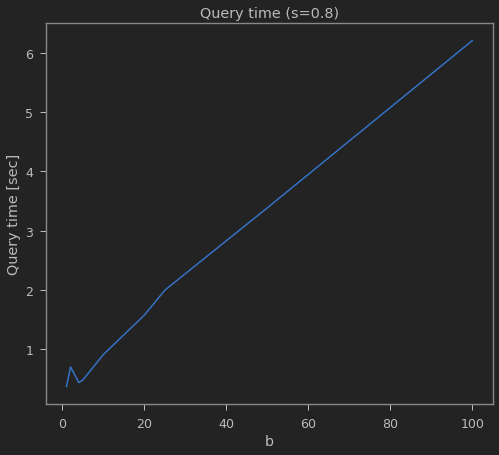

In [67]:
plt.title(f"Query time (s={s})")
plt.xlabel("b")
plt.ylabel("Query time [sec]")
plt.plot(b_list, query_time_list)
plt.show()

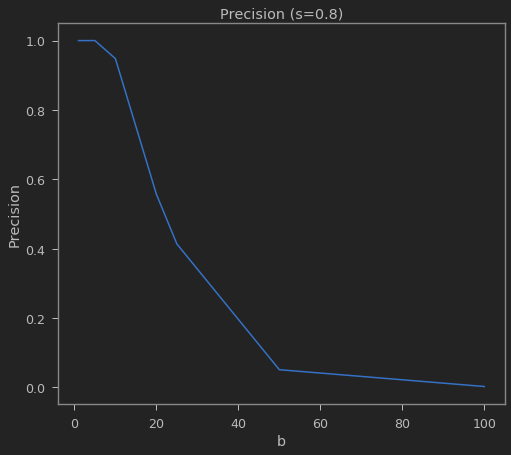

In [68]:
plt.title(f"Precision (s={s})")
plt.xlabel("b")
plt.ylabel("Precision")
plt.plot(b_list, precision_list)
plt.show()

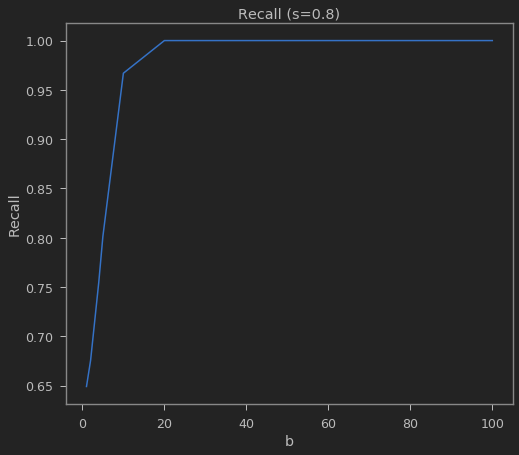

In [69]:
plt.title(f"Recall (s={s})")
plt.xlabel("b")
plt.ylabel("Recall")
plt.plot(b_list, recall_list)
plt.show()

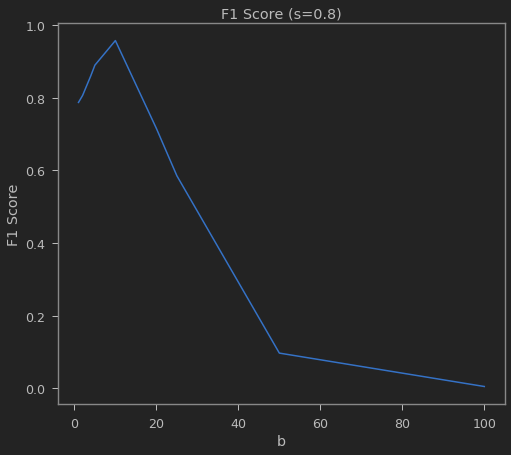

In [70]:
plt.title(f"F1 Score (s={s})")
plt.xlabel("b")
plt.ylabel("F1 Score")
plt.plot(b_list, f1_list)
plt.show()

In [64]:
# Check whether the test passed
test_msg = {True: "Passed", False: "Failed"}

print("-----Test results-----")
print(f"[Test 1.1 (1)]: {test_msg[pass_test1_1_1]}")
print(f"[Test 1.1 (2)]: {test_msg[pass_test1_1_2]}")
print(f"[Test 1.2]: {test_msg[pass_test1_2]}")
print(f"[Test 2.1]: {test_msg[pass_test2_1]}")
print(f"[Test 2.2]: {test_msg[pass_test2_2]}")
print("----------------------")

-----Test results-----
[Test 1.1 (1)]: Passed
[Test 1.1 (2)]: Passed
[Test 1.2]: Passed
[Test 2.1]: Passed
[Test 2.2]: Passed
----------------------
